# Project 02
## Malan Moody
## CSC 790 Seminar
## 4/27/2021

# Number 1:

Neural networks are computer systems inspired by the biological neural networks that make up animal brains.

Neural networks are comprised of node layers: an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any node is above a specified threshold, that node is activated, and it sends its data to the next layer. each layer's output is the subsequent layers input.

<img src="./diagram.png"/>

Each individual node has its own linear regression model, which includes inut data weights, a bias (threshold), and an output. For example:

$\sum_{i=1}^{m} w_i x_i + bias = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + bias$

$f(x) = \begin{cases} \mbox{1} & \mbox{if} \sum w_i x_i + b \geq 0 \\ \mbox{0} & \mbox{if} \sum w_i x_i + b < 0 \end{cases}$

Neural networks train using data with known inputs and results, assigning weights for each node. These weights determine the importance of each variable, with larger weights having more effect on the output. All inputs are then multiplied by their respective weights and then summed. This sum is passed through an activation function, which determines the output. If the output exceeds the threshold, it activates the node, passing data as input for the next layer in the network.

As the model is trained, its accuracy can be evaluated using a cost (or loss) function, or mean squared area (MSE).

$MSE = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}-y)^2$

where i is the index of the sample,
y-hat is the predicted result,
y is the actual result, and
m is the number of samples.

The goal is to minimize the cost. The process in which the model adjusts its weights and bias is caled gradient descent, in which it tries to reach the point of convergence of the cost function. as the model adjusts its weights and bias, it gradually coverges towards the minimum cost.

<img src="./gradient.png"/>

# Number 2:

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

from keras import regularizers

import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


Read data from csv file into a pandas dataframe

In [2]:
df = pd.read_csv('iris.csv') 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Put our 4 features in a new X dataframe by dropping species, the variable we are trying to predict

In [3]:
X = df.drop('species',axis='columns')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Use label encoder to represent species as a numerical value, and assign it to y dataframe

In [4]:
iris_fl = LabelEncoder()
df['iris_fl_n'] = iris_fl.fit_transform(df['species'])
y = df['iris_fl_n']
print(y)

res = {}
for cl in iris_fl.classes_:
    res.update({cl:iris_fl.transform([cl])[0]})       
print(res)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: iris_fl_n, Length: 150, dtype: int32
{'setosa': 0, 'versicolor': 1, 'virginica': 2}


Normalize our X dataframe for processing in our neural network

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Split our data into training and testing sets, and reshape the y sets for processing in our neural network

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

y_train=np_utils.to_categorical(Y_train,num_classes=3)
y_test=np_utils.to_categorical(Y_test,num_classes=3)
print(y_train.shape, y_test.shape)
print(y_train[0])

(120, 4) (30, 4)
(120, 3) (30, 3)
[1. 0. 0.]


Create our neural network model. 

In [7]:
model = Sequential([
    Dense(32, activation='relu', input_dim=4),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


Train the model on our data

In [8]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpj6hmetpq.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpj6hmetpq.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 12s 94ms/step - loss: 1.0620 - accuracy: 0.3520 - val_loss: 1.0180 - val_accuracy: 0.3667
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0287 - accuracy: 0.3199 - val_loss: 0.9957 - val_accuracy: 0.3667
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0045 - accuracy: 0.3277 - val_loss: 0.9738 

6/6 [==============================] - 0s 7ms/step - loss: 0.1528 - accuracy: 0.9746 - val_loss: 0.1731 - val_accuracy: 0.9667
Epoch 54/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1500 - accuracy: 0.9882 - val_loss: 0.1691 - val_accuracy: 0.9333
Epoch 55/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1430 - accuracy: 0.9868 - val_loss: 0.1653 - val_accuracy: 0.9333
Epoch 56/100
6/6 [==============================] - 0s 9ms/step - loss: 0.1487 - accuracy: 0.9835 - val_loss: 0.1611 - val_accuracy: 0.9667
Epoch 57/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1518 - accuracy: 0.9710 - val_loss: 0.1575 - val_accuracy: 0.9667
Epoch 58/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1344 - accuracy: 0.9799 - val_loss: 0.1568 - val_accuracy: 0.9333
Epoch 59/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1445 - accuracy: 0.9663 - val_loss: 0.1507 - val_accuracy: 0.9667
Epoch 60/100
6/6 [===============

Evaluate the model on our test set

In [9]:
model.evaluate(X_test, y_test)[1]

1/1 [==============================] - 0s 22ms/step - loss: 0.0914 - accuracy: 0.9667


0.9666666388511658

Graph of model loss for each epoch

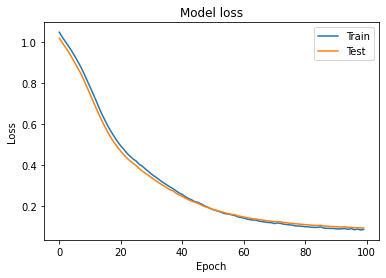

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Graph of model accuracy for each epoch

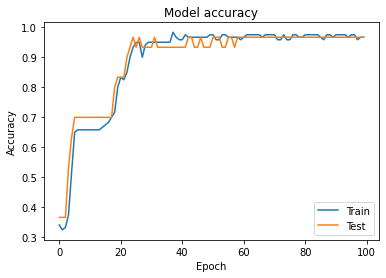

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()